In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Reading the datsaet
Data=pd.read_excel("/content/diabetes dataset.xlsx")

In [ ]:
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Splitting the data into X and Y
Y,X  = Data.iloc[:,-1:],Data.iloc[:,:-1]


In [ ]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
# Checking for the missing values(No null values present in data set)
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
corr=Data.corr()

<Axes: >

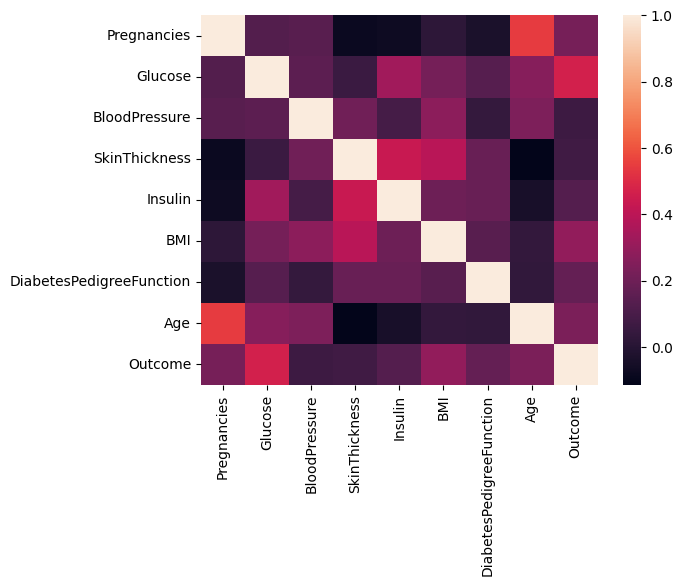

In [ ]:
sns.heatmap(corr)

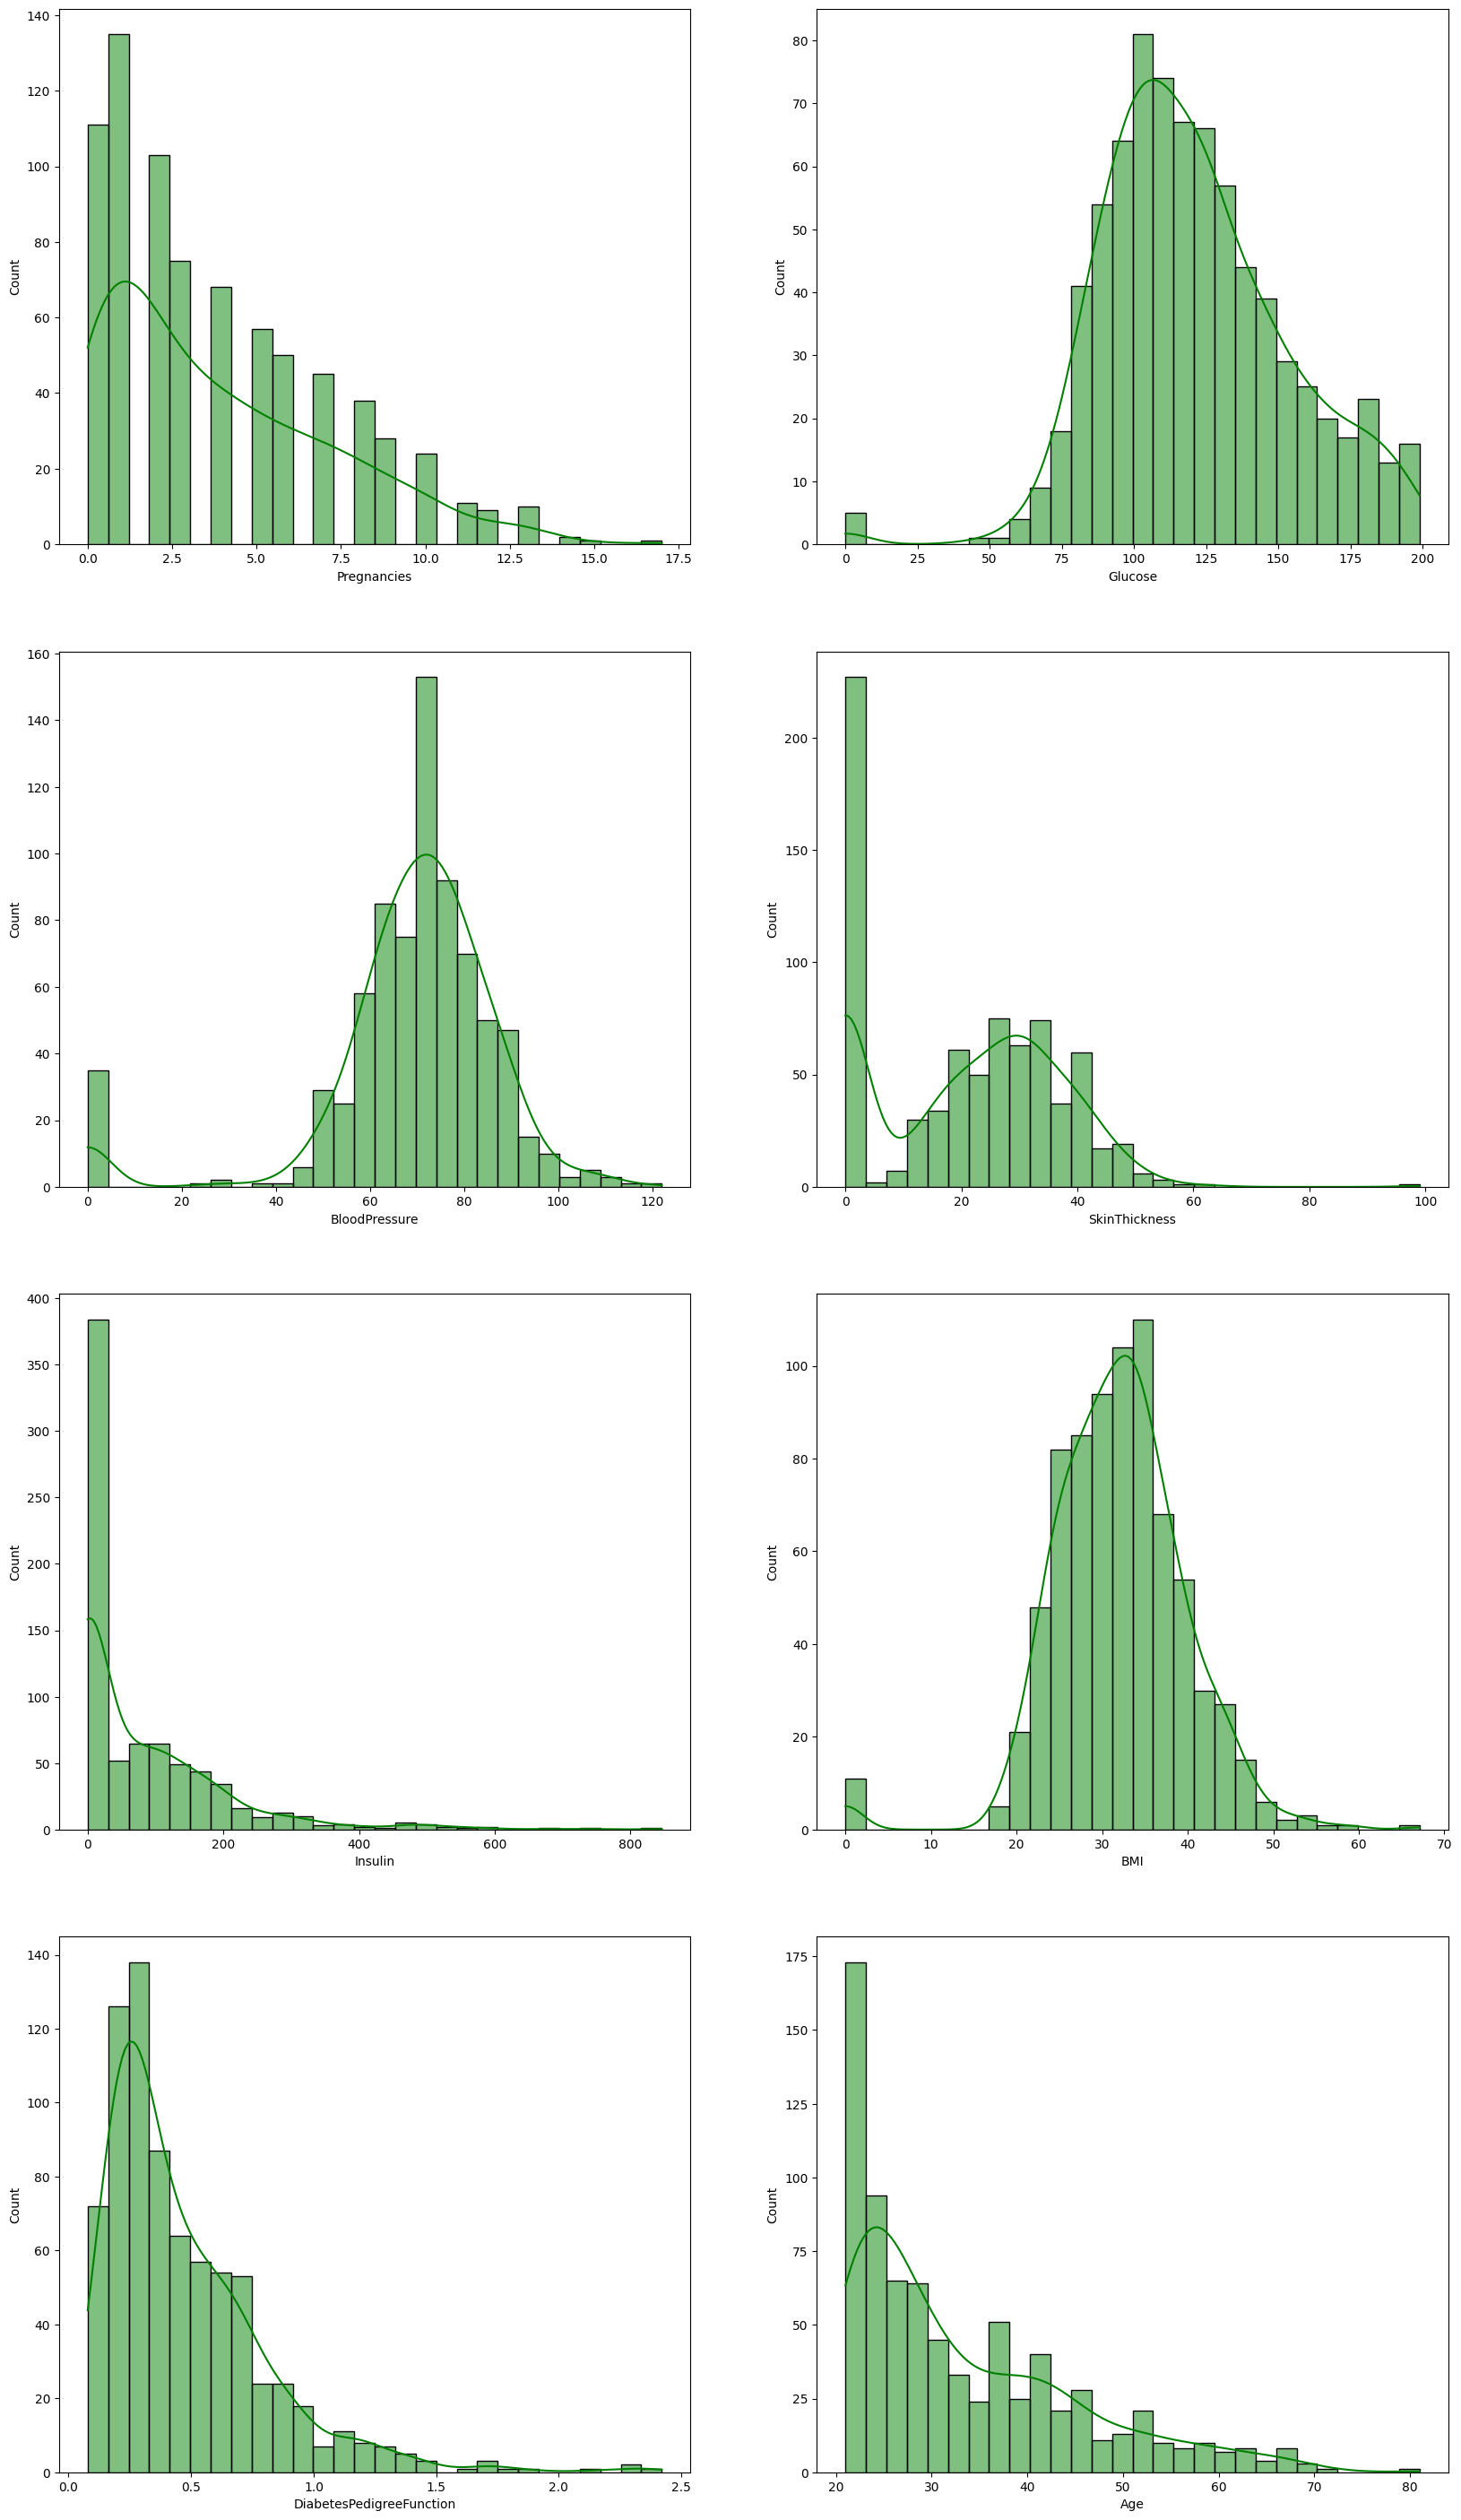

In [ ]:
#Plotting the distribution p
plt.figure(figsize = (20, 45))
for i, col in enumerate(X.columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data = X, x = col, kde = True, bins = round(np.sqrt(len(X))), color = 'g')
plt.show()

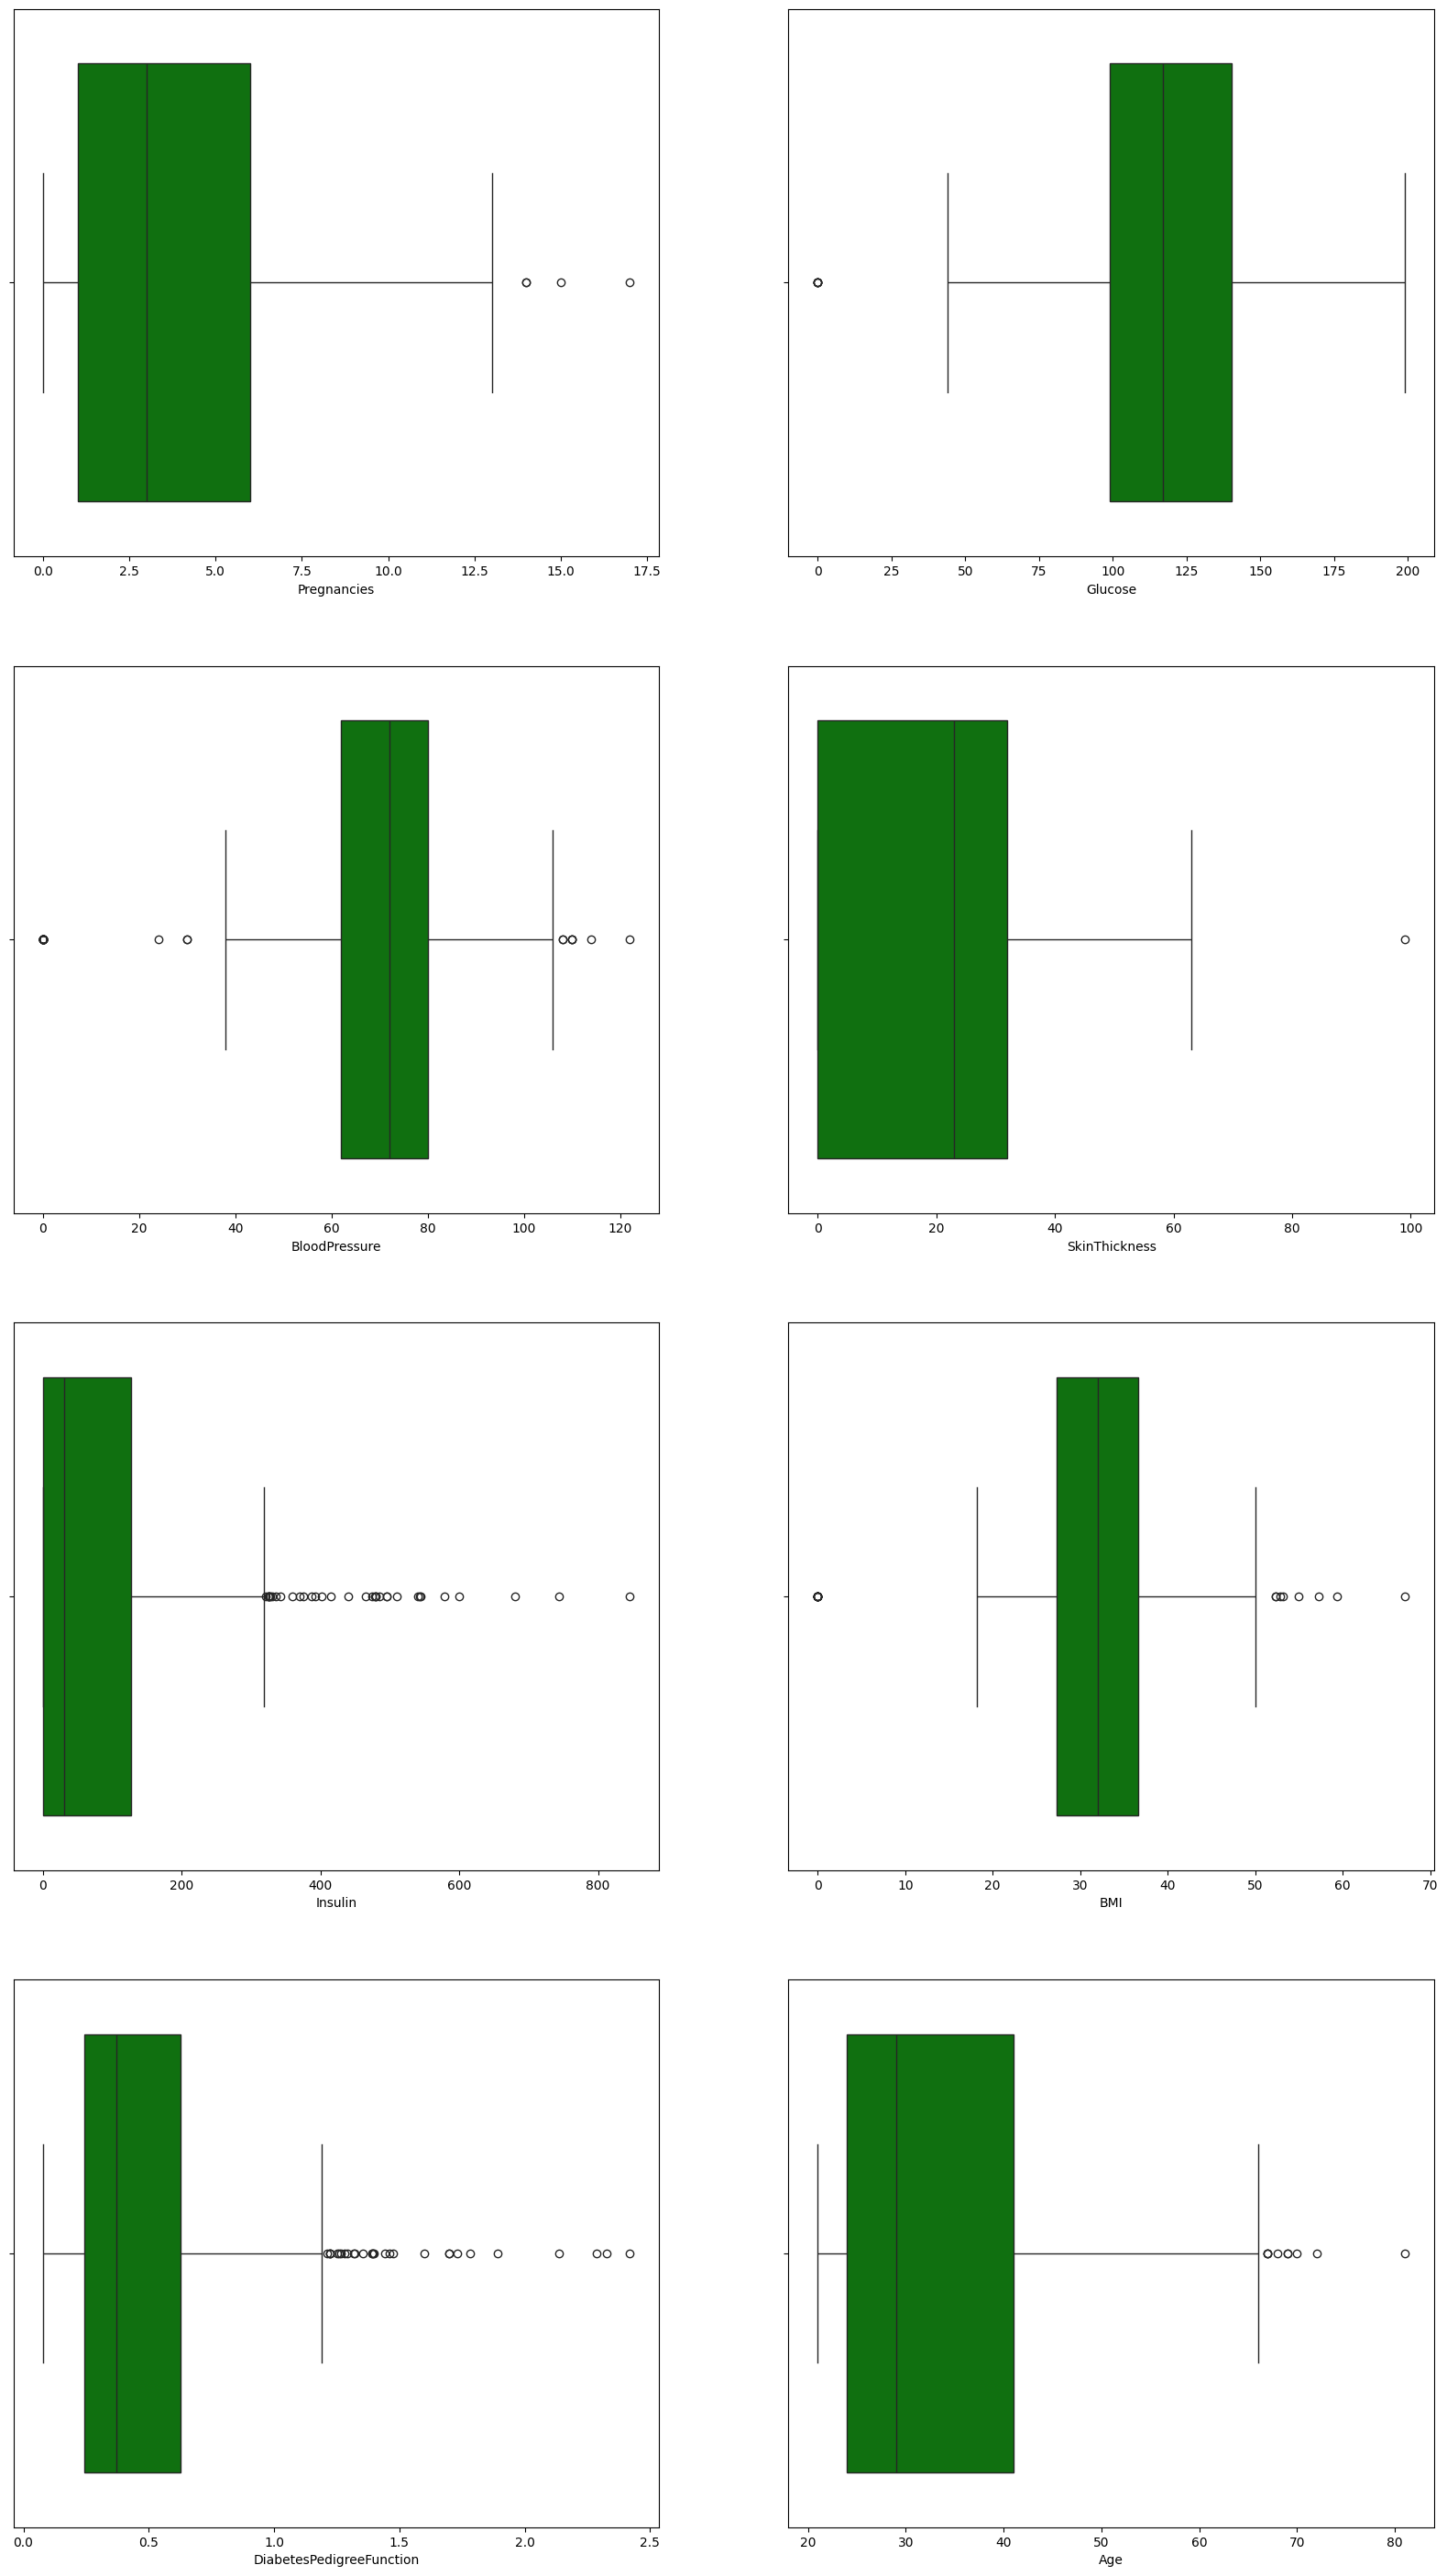

In [ ]:
#Plotting box plot for checking outliers in data

plt.figure(figsize = (20, 45))
for i, col in enumerate(X.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = X, x = col, color = 'g')

plt.show()

In [ ]:
#Calculating the number of outliers in each column
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize


z_scores = zscore(X)
outliers = (np.abs(z_scores)>3)
outliers.sum()

Pregnancies                  4
Glucose                      5
BloodPressure               35
SkinThickness                1
Insulin                     18
BMI                         14
DiabetesPedigreeFunction    11
Age                          5
dtype: int64

In [ ]:
# Using winsorization technique to deal with outliers
winsored_X = X.apply(lambda x: winsorize(x, limits = 0.05))



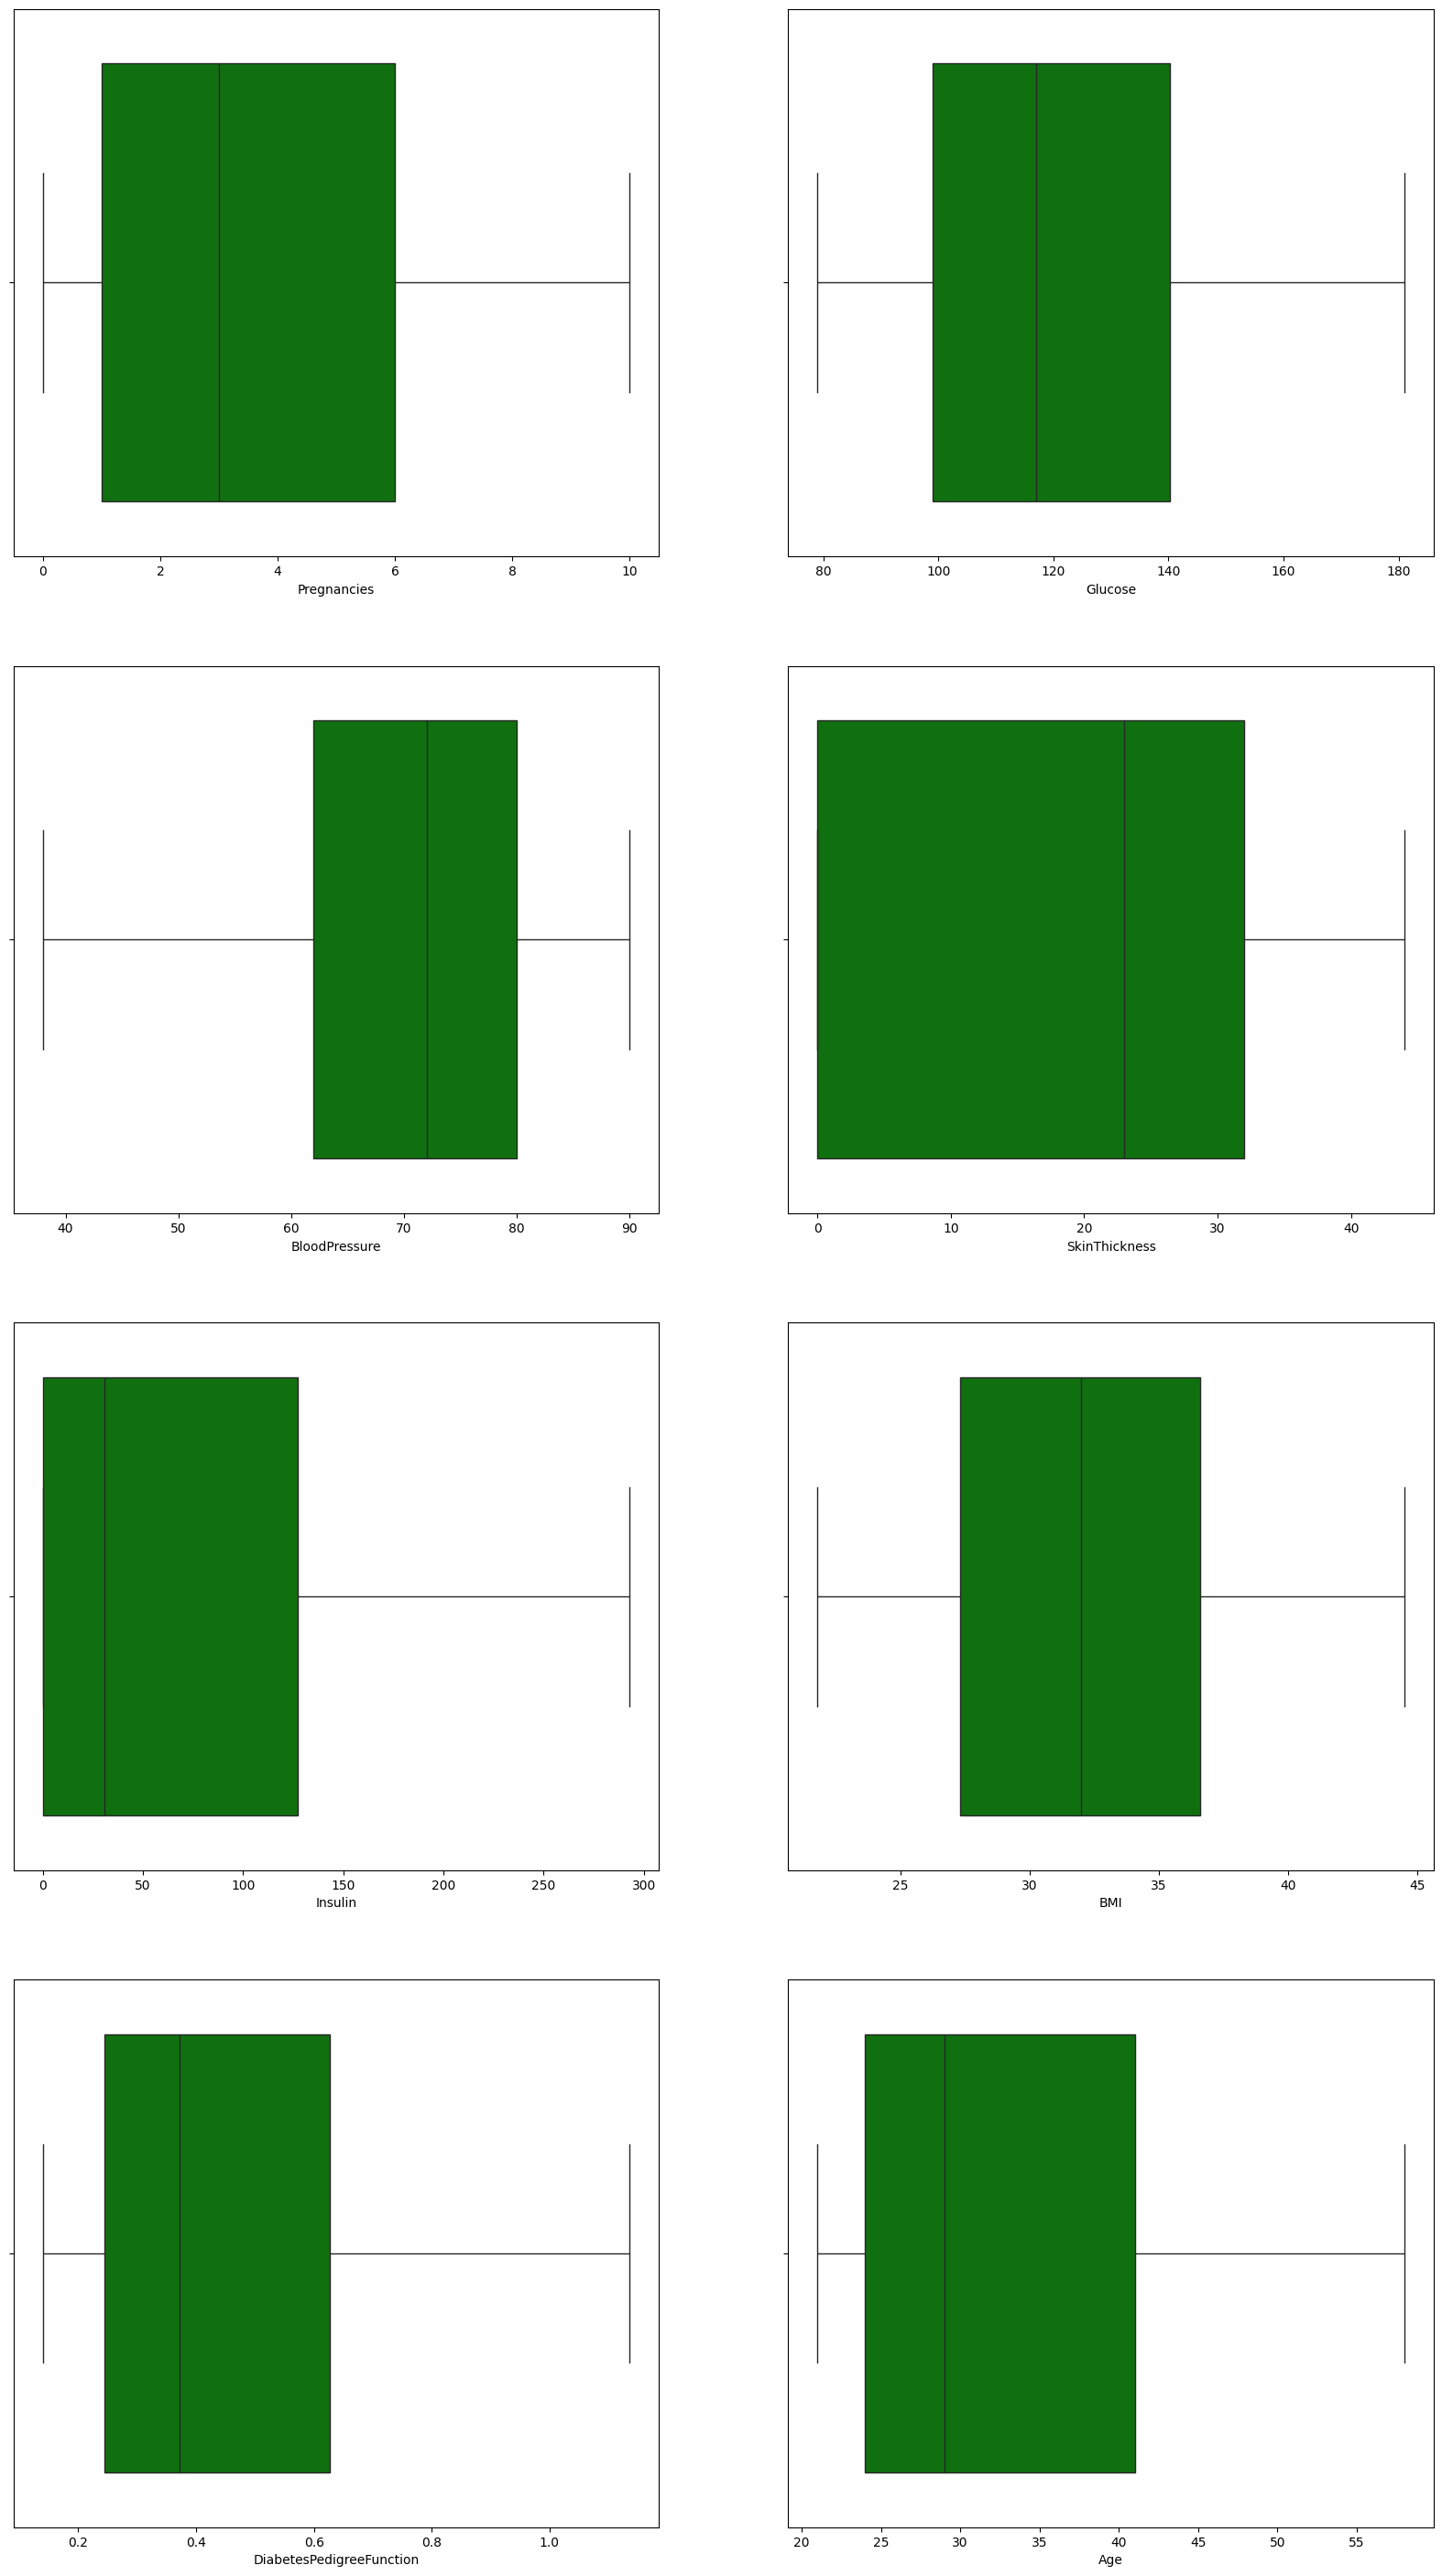

In [ ]:
#Plotting the winsorized data
plt.figure(figsize = (20, 45))
for i, col in enumerate(winsored_X.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = winsored_X, x = col, color = 'g')

plt.show()

In [ ]:
# Using standard scaling technique so that all variables are equally spaced
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # instantiate

X_scaled = scaler.fit_transform(winsored_X)


In [ ]:
# Splitting 20% of data for evaluating the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [ ]:
# Calculate accuracy, confusion matrix, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[80 19]
 [19 36]]
Precision: 0.6545454545454545
Recall: 0.6545454545454545


<Axes: >

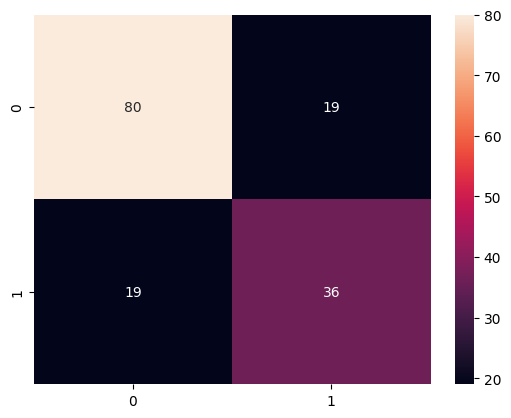

In [ ]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test, y_pred)
sns.heatmap(data=data, annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create the random forest model (adjust hyperparameters as needed)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)



<ipython-input-16-600884dbc8de>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7597402597402597
Confusion Matrix:
 [[82 17]
 [20 35]]
Precision: 0.6730769230769231
Recall: 0.6363636363636364


<Axes: >

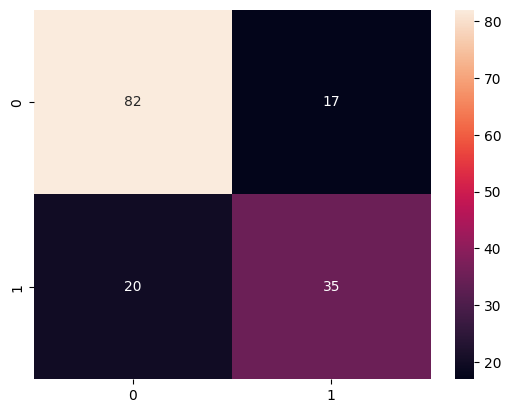

In [ ]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test, y_pred)
sns.heatmap(data=data, annot=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create the KNN model
model = KNeighborsClassifier(n_neighbors=5)  # Choose an appropriate number of neighbors (k)

# Train the model
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7012987012987013
Confusion Matrix:
 [[79 20]
 [26 29]]
Precision: 0.5918367346938775
Recall: 0.5272727272727272


<Axes: >

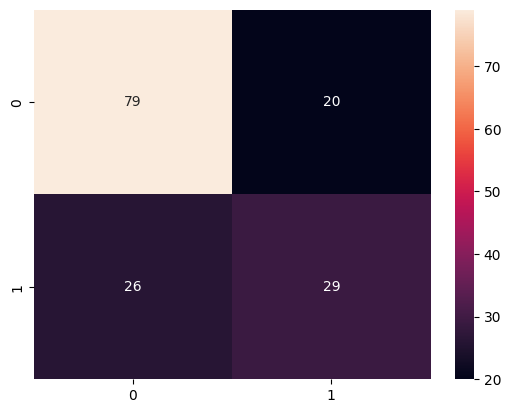

In [ ]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test, y_pred)
sns.heatmap(data=data, annot=True)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Create the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", data)

Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
Confusion Matrix:
 [[81 18]
 [19 36]]


<Axes: >

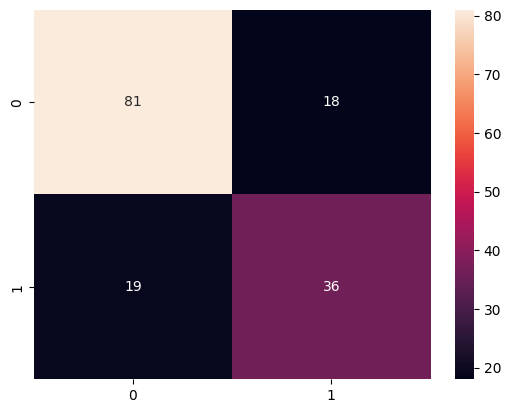

In [ ]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test, y_pred)
sns.heatmap(data=data, annot=True)